# 优化

## 高阶导数（Higher Derivatives）

高阶导数的递归式定义为：

函数 $f(x)$ 的 $n$ 阶导数 $f^{(n)}(x)$ （或记为 $\frac{d^n}{dx^n}(f)$）为：

$$f^{(n)}(x) = \frac{d}{dx}f^{(n-1)}(x)$$

如果将求导数 $\frac{d}{dx}$ 看做是一个运算符，则相当于反复对运算的结果使用 $n$ 次运算符 $(\frac{d}{dx})^n f = \frac{d^n}{dx^n} f$

In [2]:
from sympy.abc import x
from sympy.abc import y
f = x**2*y - 2*x*y

# 求关于x的二次导数
print(f.diff(x, 2))
# 2*y

# 等同于反复关于 x 求两次导数
print(f.diff(x).diff(x))
# 2*y

# 先求 x 的导数，再求 y 的导数，
print(f.diff(x).diff(y))

2*y
2*y
2*x - 2


## 优化问题（Optimization Problem）

很多时候，我们用函数来描述我们关系的额问题，例如：

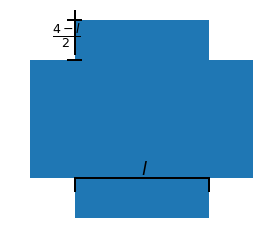

In [3]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(4, 4))
plt.axis('off')
plt.axhspan(0,1,0.2,0.8,ec = "none")
plt.axhspan(0.2,0.8,0,0.2,ec = "none")
plt.axhspan(0.2,0.8,0.8,1,ec = "none")

plt.axhline(0.2,0.2,0.8,linewidth = 2, color = 'black')
plt.axvline(0.2,0.17,0.23,linewidth = 2, color = 'black')
plt.axvline(0.8,0.17,0.23,linewidth = 2, color = 'black')

plt.axvline(0.2,0.8,1,linewidth = 2, color = 'black')
plt.axhline(0.8,0.17,0.23,linewidth = 2, color = 'black')
plt.axhline(1,0.17,0.23,linewidth = 2, color = 'black')

plt.text(0.495,0.22,r"$l$", fontsize = 18,color="black")
plt.text(0.1,0.9,r"$\frac{4-l}{2}$", fontsize = 18,color="black")

plt.show()

用一张给定边长4的正方形纸来折一个没有盖的纸盒，设纸盒的底部边长为 $l$，纸盒的高为 $\frac{4-l}{2}$，那么纸盒的体积为：

$V(l)=l^2 \frac{4-l}{2}$

我们会希望知道怎样才能使得纸盒的容积最大，也就是关心在 $l>0,4-l>0$ 的限制条件下，函数 $V(l)$ 的最大值是多少。

优化问题关心的就是这样的问题，在满足限制条件的前提之下，怎样能够使我们的目标函数最大（或最小）。

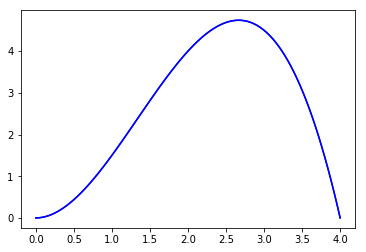

In [6]:
import numpy as np

l = np.linspace(0, 4, 100)
V = lambda l: l**2 *0.5 * (4-l)
plt.plot(l, V(l), 'b')
plt.show()

通过观察函数图，不难看出，在 $l$ 的值大约在 2.5 往上去一点的位置处，获得的纸盒的体积最大。

## 关键点（Critical Points）

通过导数一节，我们知道一个函数在某处的导数所描述的是：当输入值在该位置附近变化时，函数值所发生的相应变化。

因此，如果给定一个函数 $f$，如果知道在点 $x=a$ 处函数的导数不为 0，则在该点出稍微改变函数的输入值，函数值都会变化，这表示函数在该点的函数值即不可能是局部最大值，也不可能是局部最小值。相反，如果函数 $f$ 在点 $x=a$ 处函数的导数为 0，或者该点出的导数不存在则称这个点就被称为关键点。

要想知道一个 $f'(a) = 0$ 的关键点处，函数值 $f(a)$ 是一个局部最大值还是局部最小值，可以使用二次导数测试：
1. 如果 $f''(a) > 0$，则函数 $f$ 在 $a$ 处的函数值是局部最小值
2. 如果 $f''(a) < 0$，则函数在处的函数值是局部最大值
3. 如果 $f''(a) = 0$，则测试无法告诉我们结论

二次导数测试在中学书本中，大多是要求不求甚解地记忆的规则，其实理解起来非常容易。二次导数测试中涉及到函数在某一点处的函数值、一次导数和二次导数，于是想 $f(x)$ 在 $x=a$ 处的泰勒级数：

$f(x) = f(a) + f'(a)(x-a) + \frac{1}{2}f''(a)(x-a)^2 + \cdots$

因为 $a$ 为关键点，$f'(a)=0$，因而：

$f(x) = f(a) + \frac{1}{2}f''(a)(x-a)^2 + O(x^3)$

表明 $f''(a) \neq 0$ 时，函数 $f(x)$ 在 $x=a$ 附近的表现近似于二次函数，二次项系数 $\frac{1}{2}f''(a)$ 决定了抛物线的开口朝向，因而决定了函数值在该点是怎样的。

回到之前的求最大盒子体积的优化问题，解法如下：

In [11]:
import sympy
from sympy.abc import l
V = 0.5 * l**2 * (4-l)

# 看看一次导函数
print(V.diff(l))
# -0.5*l**2 + 1.0*l*(-l + 4)

# 一次导函数的定义域为(-oo, oo)，因此关键点 V'(l)=0 的根
cp = sympy.solve(V.diff(l), l)
print(cp)
# [0.0, 2.66666666666667]

# 找到关键点后，使用二次导数测试：
for p in cp:
    print(V.diff(l, 2).subs(l, p))

# 4.00000000000000
# -4.00000000000000

# 因此知道在l=2.666666处时，纸盒的体积最大

-0.5*l**2 + 1.0*l*(-l + 4)
[0.0, 2.66666666666667]
4.00000000000000
-4.00000000000000


## 线性回归（Linear Regression）

二维平面上有个数据点，$p_i=(x_i, y_i)$，现尝试找到一条经过原点的直线 $y=ax$，使得所有数据点到该直线的残差（数据点和回归直线之间的水平距离）的平方和最小。

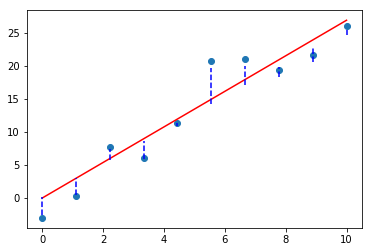

In [14]:
# 设定好随机函数的种子，确保模拟数据的可重现性
np.random.seed(123)

# 随机生成一些带误差的数据
x = np.linspace(0, 10, 10)
res = np.random.randint(-5, 5, 10)
y = 3*x + res

# 求解回归线的系数
a = sum(x*y) / sum(x**2)

plt.plot(x, y, 'o')
plt.plot(x, a*x, 'r')
for i in range(len(x)):
    plt.axvline(x[i], min((a*x[i]+5)/35.0, (y[i]+5)/35.0), \
                max((a*x[i]+5)/35.0, (y[i]+5)/35.0), \
                linestyle='--', color='b')
plt.show()

要找到这样一条直线，实际上是一个优化问题：

$\min_{a} Err(a) = \sum_i(y_i-ax_i)^2$

要找出函数 $Err(a)$ 的最小值，首先计算一次导函数：

$\frac{dErr}{da} = \sum_i 2(y_i -ax_i)(-x_i)$

$\qquad=-2\sum_i x_i y_i + 2a\sum_i x_i^2$

令该函数为 0，求解出关键点：$a = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$

使用二次导数测试：

$\frac{d^2Err}{da^2} = 2\sum_i x_i^2 > 0$

因此 $a = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$

这也是上面 Python 代码中，求解回归线斜率所用的计算方式。

如果我们不限定直线一定经过原点，即公式为 $y = ax + b$，则同样还是一个优化问题，只不过涉及的变量变成2个而已：

$\min_aErr(a, b) = \sum_i(y_i - ax_i -b)^2$

这个问题就是多元微积分里所要分析的问题了。

虽然在第二部分才会介绍具体解法，这里先给出一种 Python 中的求解方法:


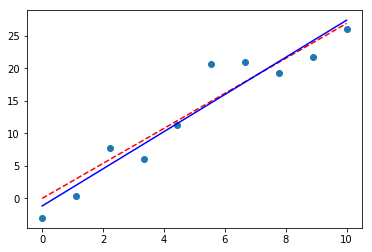

In [15]:
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, a*x, 'r', linestyle='--')
plt.plot(x, slope*x+intercept, 'b')
plt.show()